In [1]:
import pandas as pd

#load dataset

data = pd.read_csv("Insurance claims data.csv")

print(data.head())

C:\Users\musta\AppData\Local\Temp\ipykernel_15064\344418160.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


   policy_id  subscription_length  vehicle_age  customer_age region_code  \
0  POL045360                  9.3          1.2            41          C8   
1  POL016745                  8.2          1.8            35          C2   
2  POL007194                  9.5          0.2            44          C8   
3  POL018146                  5.2          0.4            44         C10   
4  POL049011                 10.1          1.0            56         C13   

   region_density segment model fuel_type     max_torque  ... is_brake_assist  \
0            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
1           27003      C1    M9    Diesel  200Nm@1750rpm  ...              No   
2            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
3           73430       A    M1       CNG   60Nm@3500rpm  ...              No   
4            5410      B2    M5    Diesel  200Nm@3000rpm  ...              No   

  is_power_door_locks  is_central_locking is_power_steer

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   subscription_length               58592 non-null  float64
 2   vehicle_age                       58592 non-null  float64
 3   customer_age                      58592 non-null  int64  
 4   region_code                       58592 non-null  object 
 5   region_density                    58592 non-null  int64  
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [3]:
data.isnull().sum()

policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

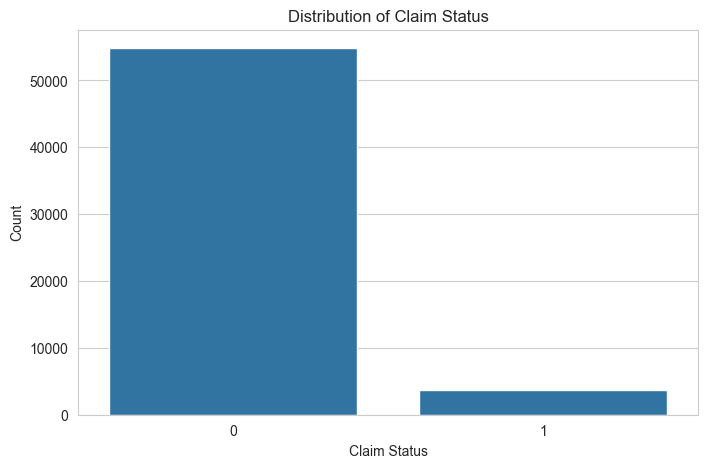

In [4]:
import matplotlib.pyplot as plt
import seaborn  as sns
sns.set_style('whitegrid')

#plotting the distribution

plt.figure(figsize=(8,5))
sns.countplot(x = 'claim_status', data = data)
plt.title('Distribution of Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Count')
plt.show()

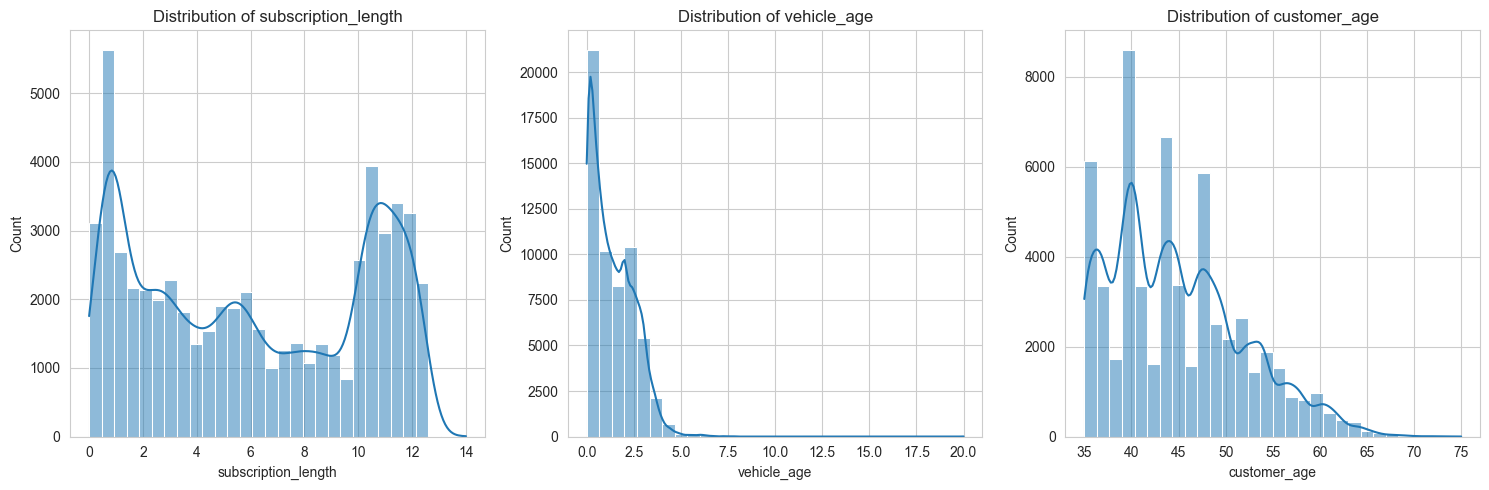

In [5]:
# selecting numerical columns for analysis
numerical_columns = ['subscription_length','vehicle_age','customer_age']

#plotting distribution of numerical features

plt.figure(figsize=(15,5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1,3,i)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

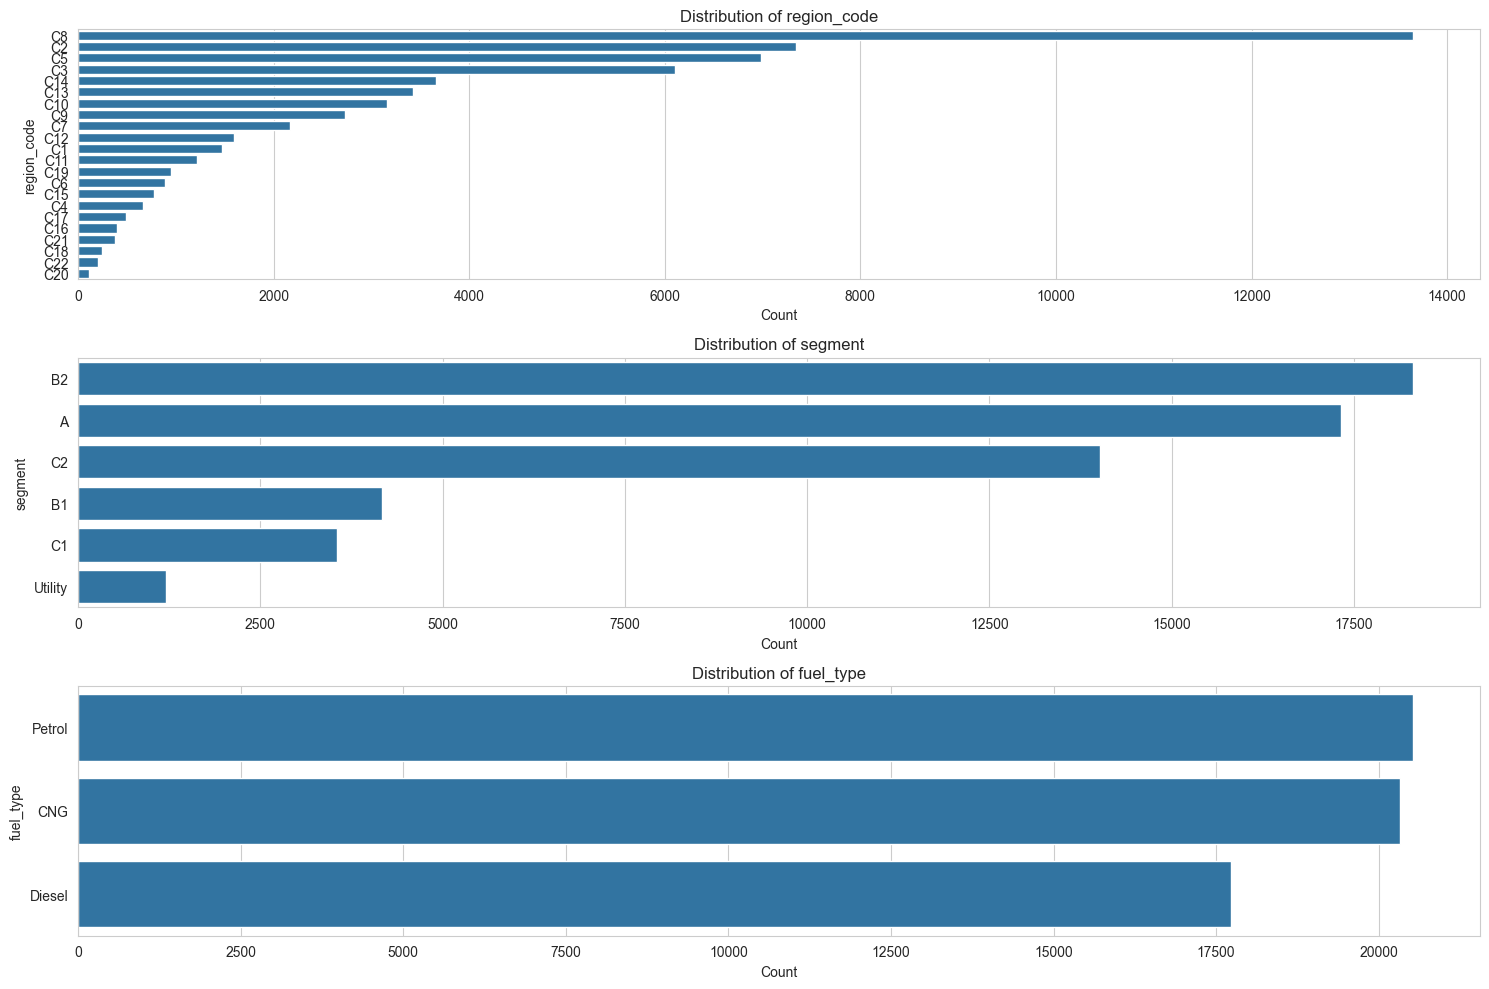

In [6]:
# selecting some relevant categorical columns for analysis
categorical_columns = ['region_code','segment','fuel_type']

#plotting distribution of categorical features
plt.figure(figsize=(15,10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3,1,i)
    sns.countplot(y = column, data = data, order = data[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


Handling Clas Imbalance(oversampling)

In [7]:
from sklearn.utils import resample

# separate majority and minority classes

majority = data[data.claim_status == 0]
minority = data[data.claim_status == 1]

#oversampling the minority class
minority_oversampled = resample(minority,
                                replace = True,
                                n_samples = len(majority),
                                random_state = 42)

# combine majority class with oversampled minority class
oversampled_data = pd.concat([majority, minority_oversampled])

# check the distribution  of undersampled and oversampled datasets

oversampled_distribution = oversampled_data.claim_status.value_counts()
oversampled_distribution

claim_status
0    54844
1    54844
Name: count, dtype: int64

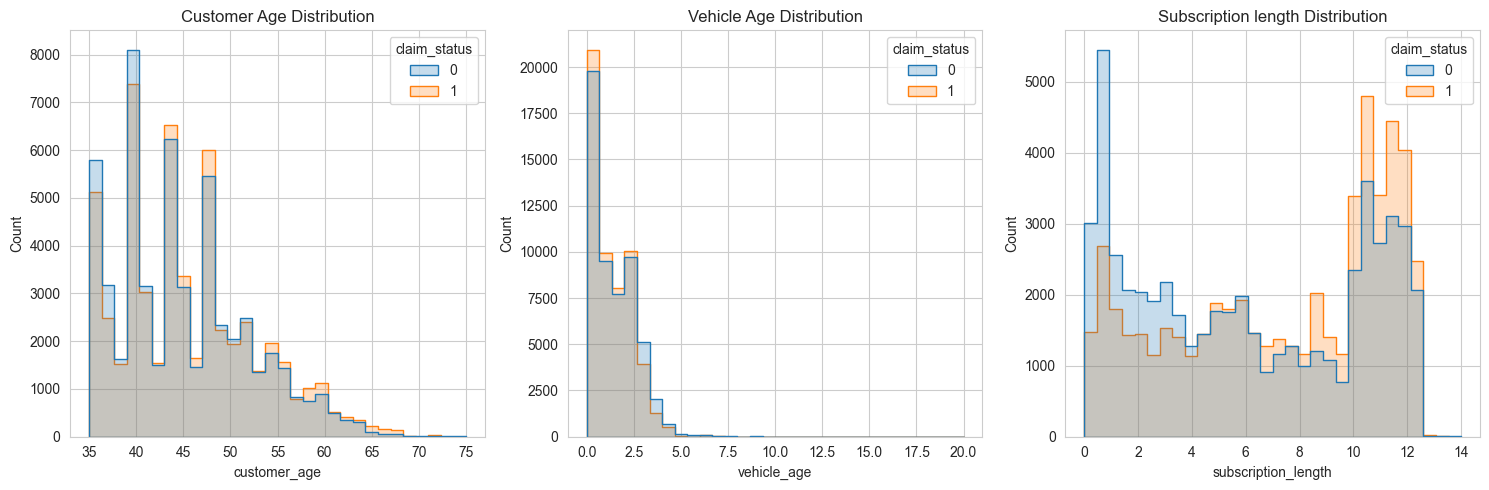

In [8]:
# plotting the distribution of 'customer_age', 'vehicle_age', and 'subscription_length' with respect to 'claim_status'
plt.figure(figsize=(15,5))

# 'customer_age' distribution
plt.subplot(1,3,1)
sns.histplot(data = oversampled_data, x = 'customer_age', hue = 'claim_status', element = 'step', bins = 30)
plt.title('Customer Age Distribution')

# 'vehicle_age' distribution

plt.subplot(1,3,2)
sns.histplot(data = oversampled_data, x = 'vehicle_age', hue = 'claim_status', element = 'step', bins = 30)
plt.title('Vehicle Age Distribution')

# 'subscription_length' distribution
plt.subplot(1,3,3)
sns.histplot(data = oversampled_data, x = 'subscription_length', hue = 'claim_status', element = 'step', bins = 30)
plt.title('Subscription length Distribution')

plt.tight_layout()
plt.show()

It looks like original data

# Feature Selection

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# encode categorical variables

le = LabelEncoder()
encoded_data = data.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

# separate features and target variable
X = encoded_data.drop('claim_status', axis = 1)
y = encoded_data['claim_status']

# create a random forest classifier model

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# get feature importance
feature_importance = rf_model.feature_importances_

# create a dataframe for visualization of feature importance

features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
features_df = features_df.sort_values(by = 'Importance', ascending =False)

print(features_df.head(10))

                Feature  Importance
0             policy_id    0.321072
1   subscription_length    0.248309
3          customer_age    0.176639
2           vehicle_age    0.135190
5        region_density    0.053838
4           region_code    0.052649
7                 model    0.000957
24               length    0.000846
26         gross_weight    0.000834
11          engine_type    0.000791


# Model Training

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# drop 'Policy_id' column from the data
oversampled_data = oversampled_data.drop('policy_id', axis = 1)

# prepare the oversampled data
X_oversampled = oversampled_data.drop('claim_status', axis = 1)
y_oversampled = oversampled_data['claim_status']

# encoding categorical columns
X_oversampled_encoded = X_oversampled.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_oversampled_encoded, y_oversampled, test_size=0.3, random_state=42)

# create and train the Random Forest model

rf_model_oversampled = RandomForestClassifier(random_state=42)
rf_model_oversampled.fit(X_train, y_train)

# predictions
y_pred = rf_model_oversampled.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     16574
           1       0.96      1.00      0.98     16333

    accuracy                           0.98     32907
   macro avg       0.98      0.98      0.98     32907
weighted avg       0.98      0.98      0.98     32907



For class 0 (no claim), precision is 1.00, meaning that when the model predicts no claim, it is correct 100% of the time. For class 1 (claim), precision is 0.96, indicating that when the model predicts a claim, it is correct 96% of the time.

For class 0, recall is 0.96, signifying that the model correctly identifies 96% of all actual no-claim instances. For class 1, recall is 1.00, showing that the model correctly identifies 100% of all actual claim instances.

The F1-score for both classes is 0.98, indicating a high balance between precision and recall. It means the model is both accurate and reliable in its predictions across both classes.

The overall accuracy of the model is 98%, which means that it correctly predicts the claim status for 98% of the cases in the test dataset.

The macro average for precision, recall and F1-score is 0.98, reflecting the average performance of the model across both classes without considering the imbalance in class distribution. This high value suggests that the model performs well across both classes. The weighted average for precision, recall, and F1-score is also 0.98, taking into account the imbalance in class distribution. It indicates that, on average, the model performs consistently well across the different classes when considering their distribution in the dataset.

In [12]:
original_encoded = data.drop('policy_id', axis = 1).copy()
encoders = {col: LabelEncoder().fit(X_oversampled[col]) for col in X_oversampled.select_dtypes(include=['object']).columns}

for col in original_encoded.select_dtypes(include=['object']).columns:
    if col in encoders:
        original_encoded[col] = encoders[col].transform(original_encoded[col])

original_encoded_predictions = rf_model_oversampled.predict(original_encoded.drop('claim_status', axis = 1))

comparison_df = pd.DataFrame({
    'Actual': original_encoded['claim_status'],
    'Predicted': original_encoded_predictions
})

print(comparison_df.head(10))

   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          1
4       0          0
5       0          0
6       0          0
7       0          0
8       0          0
9       0          0


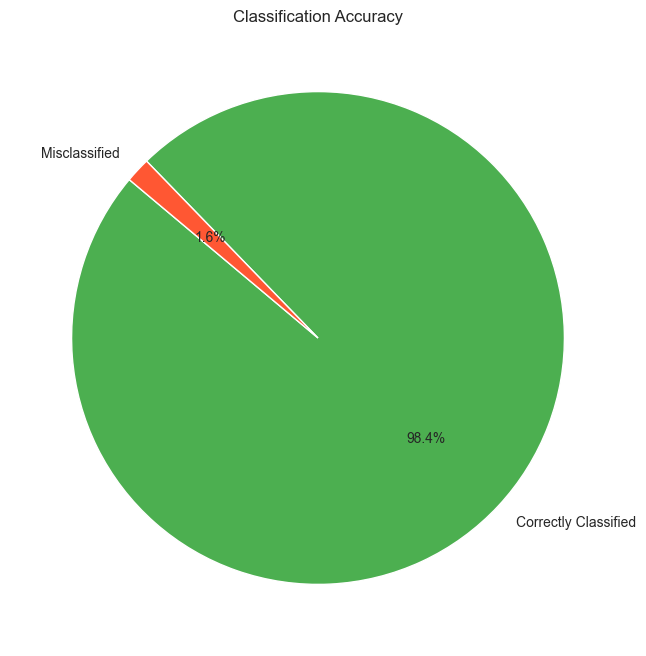

In [13]:
correctly_classified = (comparison_df['Actual'] == comparison_df['Predicted']).sum()
incorrectly_classified = (comparison_df['Actual'] != comparison_df['Predicted']).sum()

classification_counts = [correctly_classified, incorrectly_classified]
labels = ['Correctly Classified', 'Misclassified']

# create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(classification_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#FF5733'])
plt.title('Classification Accuracy')
plt.show()